In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('email_spam.csv')

In [3]:
df

title  \
0                           ?? the secrets to SUCCESS   
1                     ?? You Earned 500 GCLoot Points   
2                          ?? Your GitHub launch code   
3   [The Virtual Reward Center] Re: ** Clarifications   
4   10-1 MLB Expert Inside, Plus Everything You Ne...   
..                                                ...   
79  Your application for the position of  Child Pr...   
80     Your Kilimall Account is Ready - Shopping Now!   
81  Your Steam account: Access from new web or mob...   
82                 Your uploaded document is rejected   
83   You've Earned a Reward from Bard Explorers India   

                                                 text      type  
0   Hi James,\n\nHave you claim your complimentary...      spam  
1   \nalt_text\nCongratulations, you just earned\n...  not spam  
2   Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3   Hello,\n \nThank you for contacting the Virtua...  not spam  
4   Hey Prachanda Rawal,\n\nToday's newsletter is ...      spam  
..                                                ...       ...  
79  Dear Maryam, \n\n \n\nI would like to thank yo...  not spam  
80  Dear Customer,\n\nWelcome to Kilimall, Thanks ...  not spam  
81  Dear vladis163rus,\nHere is the Steam Guard co...  not spam  
82  View In Browser | Log in\n \n \n\nSkrill logo\...  not spam  
83  You've received a gift!\nSign in to your Bard ...  not spam  

[84 rows x 3 columns]

In [4]:
df.head(5)

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text      type  
0  Hi James,\n\nHave you claim your complimentary...      spam  
1  \nalt_text\nCongratulations, you just earned\n...  not spam  
2  Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3  Hello,\n \nThank you for contacting the Virtua...  not spam  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...      spam

In [5]:
df.shape

(84, 3)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
encoder.fit_transform(df['type'])          #spam=1 and not-spam =0

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [9]:
df['type'] = encoder.fit_transform(df['type']) 

In [10]:
df.head()

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  
0  Hi James,\n\nHave you claim your complimentary...     1  
1  \nalt_text\nCongratulations, you just earned\n...     0  
2  Here's your GitHub launch code, @Mortyj420!\n ...     0  
3  Hello,\n \nThank you for contacting the Virtua...     0  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1

In [11]:
import seaborn as sns

In [12]:
# missing values
df.isnull().sum()

title    0
text     0
type     0
dtype: int64

<Axes: >

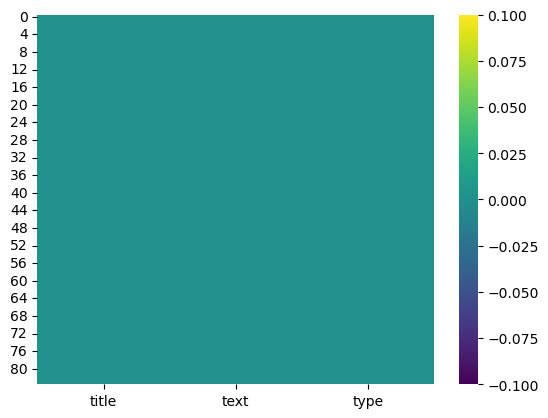

In [13]:
sns.heatmap(df.isnull(), cmap='viridis')

In [14]:
# check for duplicate values
df.duplicated().sum()

1

In [15]:
df.dtypes

title    object
text     object
type      int32
dtype: object

In [16]:
# remove duplicates
df.drop_duplicates(keep='first')

title  \
0                           ?? the secrets to SUCCESS   
1                     ?? You Earned 500 GCLoot Points   
2                          ?? Your GitHub launch code   
3   [The Virtual Reward Center] Re: ** Clarifications   
4   10-1 MLB Expert Inside, Plus Everything You Ne...   
..                                                ...   
79  Your application for the position of  Child Pr...   
80     Your Kilimall Account is Ready - Shopping Now!   
81  Your Steam account: Access from new web or mob...   
82                 Your uploaded document is rejected   
83   You've Earned a Reward from Bard Explorers India   

                                                 text  type  
0   Hi James,\n\nHave you claim your complimentary...     1  
1   \nalt_text\nCongratulations, you just earned\n...     0  
2   Here's your GitHub launch code, @Mortyj420!\n ...     0  
3   Hello,\n \nThank you for contacting the Virtua...     0  
4   Hey Prachanda Rawal,\n\nToday's newsletter is ...     1  
..                                                ...   ...  
79  Dear Maryam, \n\n \n\nI would like to thank yo...     0  
80  Dear Customer,\n\nWelcome to Kilimall, Thanks ...     0  
81  Dear vladis163rus,\nHere is the Steam Guard co...     0  
82  View In Browser | Log in\n \n \n\nSkrill logo\...     0  
83  You've received a gift!\nSign in to your Bard ...     0  

[83 rows x 3 columns]

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.shape

(83, 3)

In [19]:
## Identify Categorical columns
df.select_dtypes(include='object').columns

Index(['title', 'text'], dtype='object')

In [20]:
df['text'].unique()
df['text'].value_counts()

text
We noticed a new login\nHello ondiekijohn254@gmail.com, we noticed an unusual login from a device or location you don't usually use.\nWas this you?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## 2.EDA

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

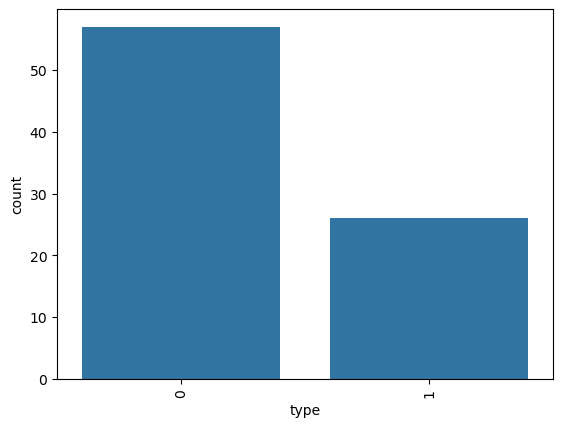

In [21]:
import matplotlib.pyplot as plt
sns.countplot(data=df, x='type')
plt.xticks(rotation=90)

count    83.000000
mean      0.313253
std       0.466636
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: type, dtype: float64

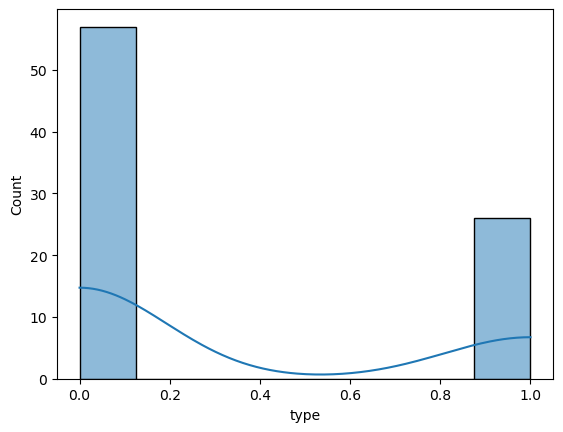

In [22]:
#Analyze Numerical Columns
sns.histplot(df['type'], kde=True)
df['type'].describe()

In [23]:
df['type'].nunique()
df['type'].unique()
df['type'].value_counts()

type
0    57
1    26
Name: count, dtype: int64

In [24]:
## Data Cleaning
df.rename(columns={'old': 'new'}, inplace=True)


C:\Users\soniy\AppData\Local\Temp\ipykernel_84732\932868957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'old': 'new'}, inplace=True)


<Axes: >

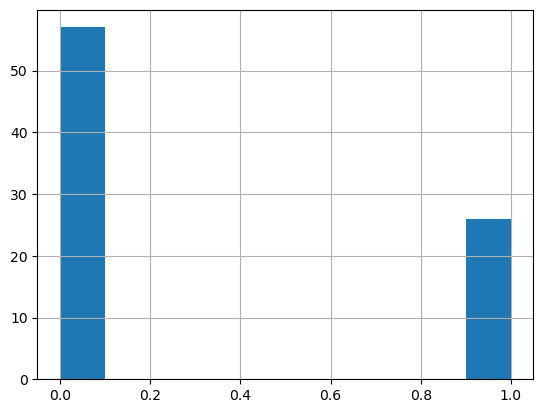

In [25]:
df['type'].hist()

In [26]:
# Univariate Analysis    #Independent analysis of each column

# 1. Categorical Data
## a. Countplot

type
0    57
1    26
Name: count, dtype: int64

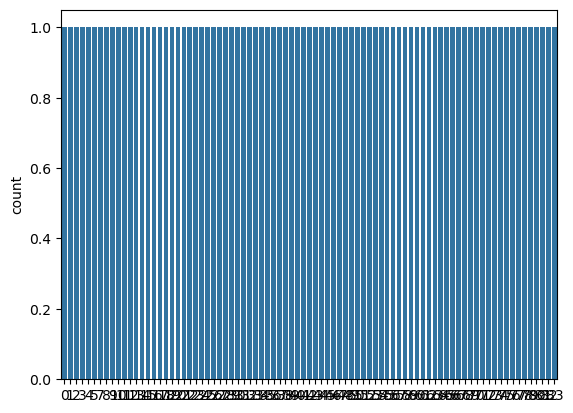

In [27]:
sns.countplot(df['type'])
df['type'].value_counts()

In [28]:
df['type'].value_counts().plot(kind='bar')

<Axes: xlabel='type'>

In [29]:
df.head()

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  
0  Hi James,\n\nHave you claim your complimentary...     1  
1  \nalt_text\nCongratulations, you just earned\n...     0  
2  Here's your GitHub launch code, @Mortyj420!\n ...     0  
3  Hello,\n \nThank you for contacting the Virtua...     0  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1

In [30]:
df['type'].value_counts()

type
0    57
1    26
Name: count, dtype: int64

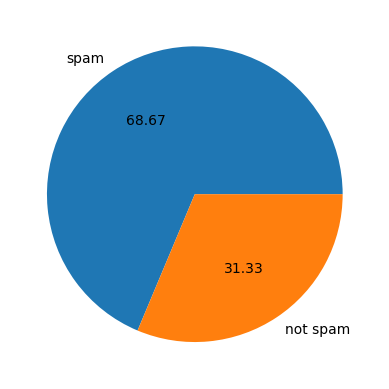

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels=['spam','not spam'],autopct="%0.2f")
plt.show()

In [32]:
df['text'].apply(len)

0      302
1      350
2      166
3      399
4     6079
      ... 
79     432
80     466
81    1060
82    3163
83     499
Name: text, Length: 83, dtype: int64

In [33]:
df['num_characters'] = df['text'].apply(len)

C:\Users\soniy\AppData\Local\Temp\ipykernel_84732\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [34]:
df.head()

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  num_characters  
0  Hi James,\n\nHave you claim your complimentary...     1             302  
1  \nalt_text\nCongratulations, you just earned\n...     0             350  
2  Here's your GitHub launch code, @Mortyj420!\n ...     0             166  
3  Hello,\n \nThank you for contacting the Virtua...     0             399  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1            6079

In [35]:
df['num_words'] = df['text'].apply(len)

C:\Users\soniy\AppData\Local\Temp\ipykernel_84732\1146732426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(len)


In [36]:
df.head()

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  num_characters  \
0  Hi James,\n\nHave you claim your complimentary...     1             302   
1  \nalt_text\nCongratulations, you just earned\n...     0             350   
2  Here's your GitHub launch code, @Mortyj420!\n ...     0             166   
3  Hello,\n \nThank you for contacting the Virtua...     0             399   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1            6079   

   num_words  
0        302  
1        350  
2        166  
3        399  
4       6079

In [37]:
df['num_sentences'] = df['text'].apply(len)

C:\Users\soniy\AppData\Local\Temp\ipykernel_84732\257932890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(len)


In [38]:
df.head()

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  num_characters  \
0  Hi James,\n\nHave you claim your complimentary...     1             302   
1  \nalt_text\nCongratulations, you just earned\n...     0             350   
2  Here's your GitHub launch code, @Mortyj420!\n ...     0             166   
3  Hello,\n \nThank you for contacting the Virtua...     0             399   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1            6079   

   num_words  num_sentences  
0        302            302  
1        350            350  
2        166            166  
3        399            399  
4       6079           6079

In [39]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count       83.000000    83.000000      83.000000
mean       843.144578   843.144578     843.144578
std        995.546524   995.546524     995.546524
min         19.000000    19.000000      19.000000
25%        311.500000   311.500000     311.500000
50%        557.000000   557.000000     557.000000
75%        929.000000   929.000000     929.000000
max       6079.000000  6079.000000    6079.000000

In [40]:
import seaborn as sns

In [41]:
sns.histplot(df[df['type'] == 0]['num_characters'])            ## Blue color = 0 : not spam
sns.histplot(df[df['type'] == 1]['num_characters'],color='red') ## red color = 0 :  spam
                                                                    

<Axes: xlabel='num_characters', ylabel='Count'>

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_characters'])            ## Blue color = 0 : not spam
sns.histplot(df[df['type'] == 1]['num_characters'],color='red') ## red color = 1 :  spam
                                                                    

<Axes: xlabel='num_characters', ylabel='Count'>

<Axes: xlabel='num_words', ylabel='Count'>

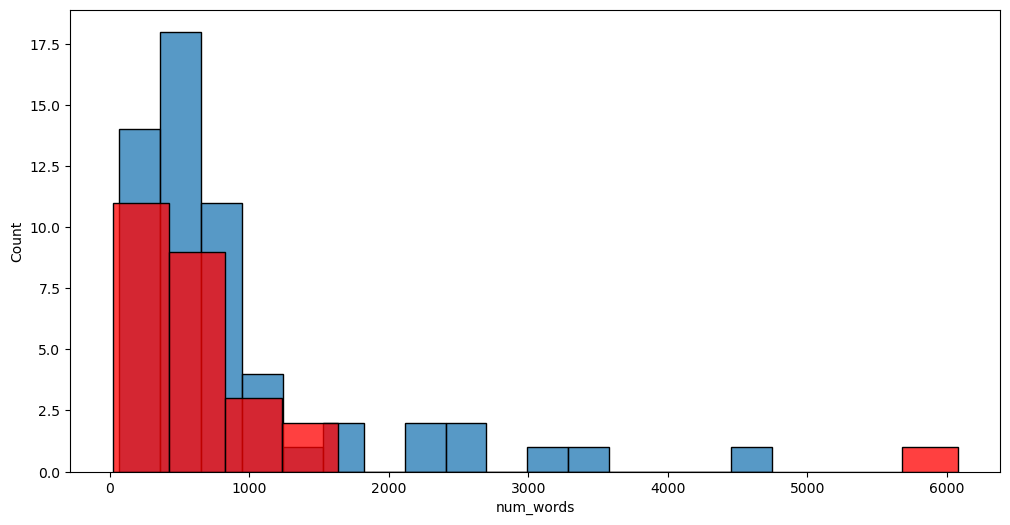

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_words'])            ## Blue color = 0 : not spam
sns.histplot(df[df['type'] == 1]['num_words'],color='red') ## red color = 0 :  spam
                                                                    

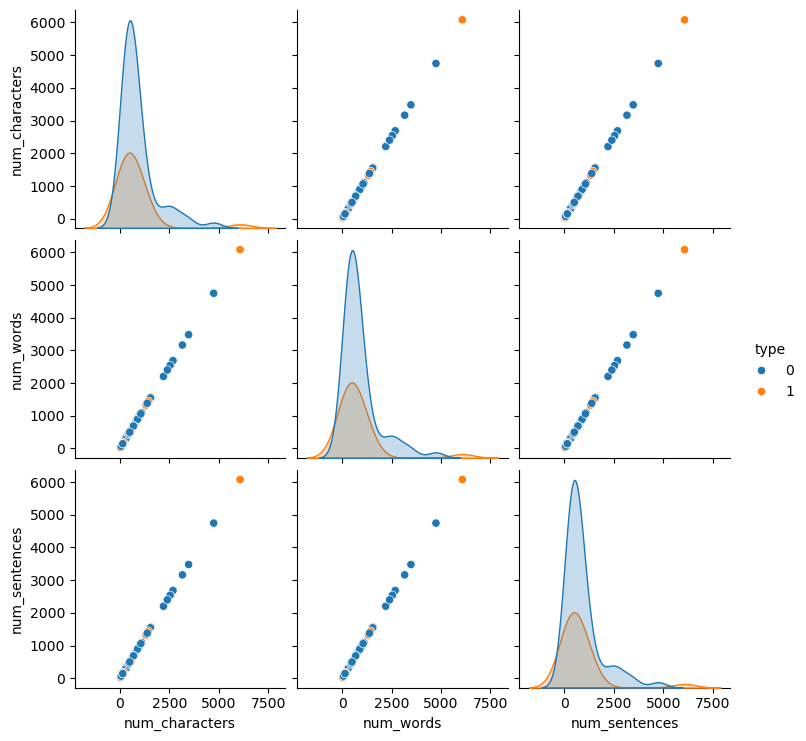

In [44]:
sns.pairplot(df,hue='type')

In [45]:
corr = df.select_dtypes(include=['number'])

<Axes: >

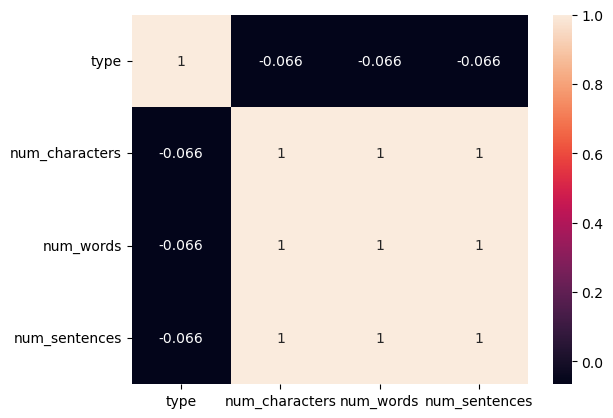

In [46]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


 ## 3. Data Preprocessing

In [47]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [64]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [65]:
# Lower case and tokenization
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [69]:
ps = PorterStemmer()
print(transform_text('Hi how Are you %% eg') )            ## % = special character

hi eg


In [70]:
transform_text('Hi how Are you Soniya?') 

'hi soniya'

In [71]:
transform_text('I loved the YT lectures on ML. How about you?')

'love yt lectur ml'

In [72]:
# Removing special characters
df['text'][10]


"GOOD DAY SIR/MADAM \n\n In 2020 I applied to the institution but I didn't know I was accepted for the 2021 Arcademic Year. As I was trying to apply for this year for the past few months but with no success, I noticed that I owe the institution R3280. I kindly please ask for your assistance as I wish to enroll in this Institution for this Academic year 2022.\n\nYOURS SINCERELY \nRESHOKETSWE SEKHUKHUNE"

In [73]:
## Removing stopwords and punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soniy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [74]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [76]:
df['text'].apply(transform_text)

0     hi jame claim complimentari gift yet compil sp...
1     congratul earn 500 complet follow offer view p...
2     github launch code mortyj420 octocat stand nex...
3     hello thank contact virtual reward center virt...
4     hey prachanda rawal today newslett everyth nee...
                            ...                        
79    dear maryam would like thank applic role child...
80    dear custom welcom kilimal thank much join us ...
81    dear vladis163ru steam guard code need login a...
82    view browser log skrill logo money mover maker...
83    receiv gift sign bard explor india commun clic...
Name: text, Length: 83, dtype: object

In [77]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\soniy\AppData\Local\Temp\ipykernel_84732\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [78]:
df.head()

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  num_characters  \
0  Hi James,\n\nHave you claim your complimentary...     1             302   
1  \nalt_text\nCongratulations, you just earned\n...     0             350   
2  Here's your GitHub launch code, @Mortyj420!\n ...     0             166   
3  Hello,\n \nThank you for contacting the Virtua...     0             399   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1            6079   

   num_words  num_sentences                                   transformed_text  
0        302            302  hi jame claim complimentari gift yet compil sp...  
1        350            350  congratul earn 500 complet follow offer view p...  
2        166            166  github launch code mortyj420 octocat stand nex...  
3        399            399  hello thank contact virtual reward center virt...  
4       6079           6079  hey prachanda rawal today newslett everyth nee...

In [79]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [80]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [81]:
wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))

In [82]:
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))

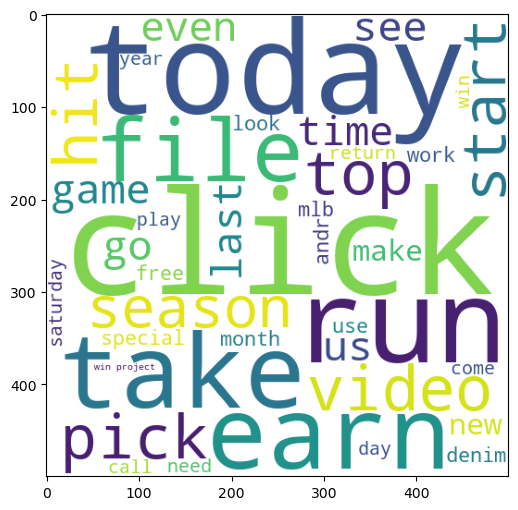

In [83]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [84]:
notspam_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))

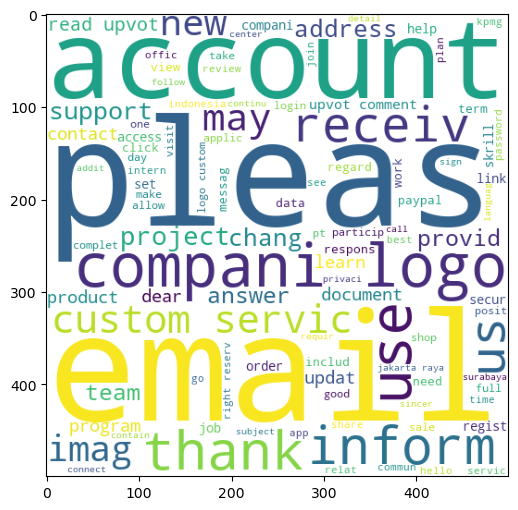

In [85]:
plt.figure(figsize=(15,6))
plt.imshow(notspam_wc)

In [86]:
df.head()

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  num_characters  \
0  Hi James,\n\nHave you claim your complimentary...     1             302   
1  \nalt_text\nCongratulations, you just earned\n...     0             350   
2  Here's your GitHub launch code, @Mortyj420!\n ...     0             166   
3  Hello,\n \nThank you for contacting the Virtua...     0             399   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1            6079   

   num_words  num_sentences                                   transformed_text  
0        302            302  hi jame claim complimentari gift yet compil sp...  
1        350            350  congratul earn 500 complet follow offer view p...  
2        166            166  github launch code mortyj420 octocat stand nex...  
3        399            399  hello thank contact virtual reward center virt...  
4       6079           6079  hey prachanda rawal today newslett everyth nee...

In [87]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [88]:
spam_corpus

['hi',
 'jame',
 'claim',
 'complimentari',
 'gift',
 'yet',
 'compil',
 'special',
 'astrolog',
 'gift',
 'predict',
 'everyth',
 'futur',
 'enabl',
 'take',
 'correct',
 'action',
 'click',
 'claim',
 'copi',
 'claim',
 'thank',
 'later',
 'love',
 'heather',
 'hey',
 'prachanda',
 'rawal',
 'today',
 'newslett',
 'everyth',
 'need',
 'blockbust',
 'day',
 'includ',
 'insid',
 'play',
 'video',
 'pick',
 'two',
 'spotlight',
 'game',
 'special',
 'insid',
 'deal',
 'way',
 'say',
 'thank',
 'insid',
 'strap',
 'let',
 'great',
 'saturday',
 'expert',
 'day',
 'andr',
 'ifil',
 'andr',
 'tower',
 'ifil',
 'anoth',
 'strong',
 'mlb',
 'keep',
 'roll',
 'today',
 'andr',
 'come',
 'perfect',
 'day',
 'mlb',
 'diamond',
 'last',
 'one',
 'heck',
 'run',
 'today',
 'andr',
 'zero',
 'huge',
 'mlb',
 'play',
 'call',
 'saturday',
 'sizzler',
 'best',
 'play',
 'click',
 'get',
 'andr',
 'saturday',
 'sizzler',
 'click',
 'get',
 'week',
 'andr',
 'mlb',
 'play',
 'special',
 'offer',
 'cea

In [89]:
len(spam_corpus)

1785

In [90]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('click', 20),
 ('today', 16),
 ('run', 13),
 ('win', 12),
 ('game', 11),
 ('get', 11),
 ('take', 10),
 ('earn', 10),
 ('file', 10),
 ('video', 9),
 ('pick', 9),
 ('top', 9),
 ('start', 9),
 ('hit', 9),
 ('season', 9),
 ('project', 9),
 ('last', 8),
 ('go', 8),
 ('see', 8),
 ('us', 8),
 ('time', 8),
 ('even', 8),
 ('make', 8),
 ('new', 8),
 ('special', 7),
 ('andr', 7),
 ('mlb', 7),
 ('use', 7),
 ('look', 7),
 ('like', 7)]

In [91]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

0   1
0     click  20
1     today  16
2       run  13
3       win  12
4      game  11
5       get  11
6      take  10
7      earn  10
8      file  10
9     video   9
10     pick   9
11      top   9
12    start   9
13      hit   9
14   season   9
15  project   9
16     last   8
17       go   8
18      see   8
19       us   8
20     time   8
21     even   8
22     make   8
23      new   8
24  special   7
25     andr   7
26      mlb   7
27      use   7
28     look   7
29     like   7

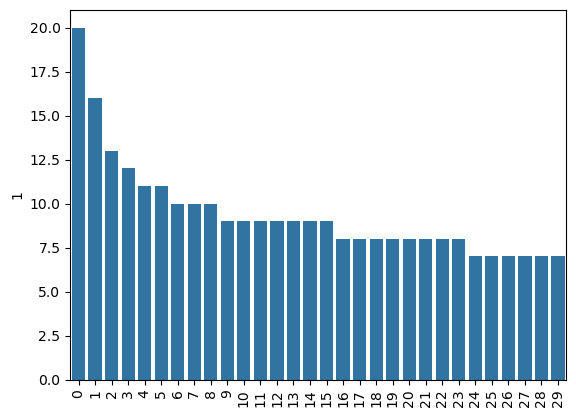

In [92]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [93]:
notspam_corpus = []
for msg in df[df['type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        notspam_corpus.append(word)

In [94]:
len(notspam_corpus)

4617

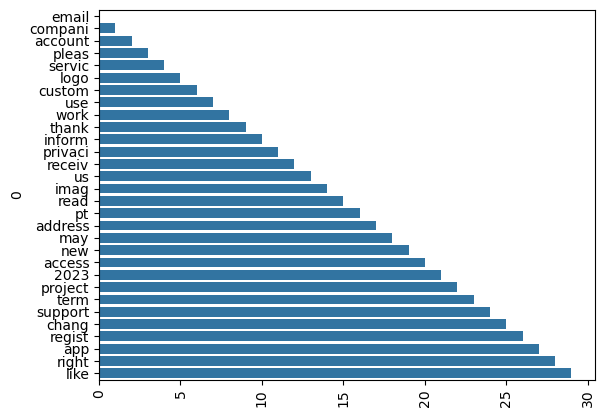

In [95]:
sns.barplot(pd.DataFrame(Counter(notspam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
from collections import Counter
Counter(notspam_corpus).most_common(30)
pd.DataFrame(Counter(notspam_corpus).most_common(30))

0   1
0     email  47
1   compani  43
2   account  43
3     pleas  41
4    servic  35
5      logo  34
6    custom  27
7       use  27
8      work  25
9     thank  24
10   inform  22
11  privaci  21
12   receiv  20
13       us  20
14     imag  20
15     read  20
16       pt  20
17  address  19
18      may  19
19      new  18
20   access  18
21     2023  17
22  project  17
23     term  17
24  support  16
25    chang  15
26   regist  15
27      app  15
28    right  15
29     like  15

In [97]:
# Text Vectorization
#using Bag of Words
df.head()

title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  num_characters  \
0  Hi James,\n\nHave you claim your complimentary...     1             302   
1  \nalt_text\nCongratulations, you just earned\n...     0             350   
2  Here's your GitHub launch code, @Mortyj420!\n ...     0             166   
3  Hello,\n \nThank you for contacting the Virtua...     0             399   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1            6079   

   num_words  num_sentences                                   transformed_text  
0        302            302  hi jame claim complimentari gift yet compil sp...  
1        350            350  congratul earn 500 complet follow offer view p...  
2        166            166  github launch code mortyj420 octocat stand nex...  
3        399            399  hello thank contact virtual reward center virt...  
4       6079           6079  hey prachanda rawal today newslett everyth nee...

## 4.Model Building

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [99]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [100]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [101]:
X.shape      # 83 = SMS
             # 2085 = words

(83, 2085)

In [102]:
y = df['type'].values

In [103]:
y

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [107]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [108]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7647058823529411
[[10  1]
 [ 3  3]]
0.75


In [109]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7647058823529411
[[7 4]
 [0 6]]
0.6


In [110]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.6470588235294118
[[10  1]
 [ 5  1]]
0.5


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier



In [112]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [113]:
#Dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : gnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'BgC' : bc,
    'ETC' : etc,
}   

In [114]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [115]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.5882352941176471, 0.4)

In [116]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.5882352941176471
Precision -  0.4
For  KN
Accuracy -  0.35294117647058826
Precision -  0.35294117647058826
For  NB
Accuracy -  0.7647058823529411
Precision -  0.75
For  DT
Accuracy -  0.47058823529411764
Precision -  0.3333333333333333
For  LR
Accuracy -  0.4117647058823529
Precision -  0.16666666666666666
For  RF
Accuracy -  0.5294117647058824
Precision -  0.375
For  BgC
Accuracy -  0.47058823529411764
Precision -  0.2857142857142857
For  ETC
Accuracy -  0.6470588235294118
Precision -  0.5


In [117]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [118]:
performance_df

Algorithm  Accuracy  Precision
2        NB  0.764706   0.750000
7       ETC  0.647059   0.500000
0       SVC  0.588235   0.400000
5        RF  0.529412   0.375000
1        KN  0.352941   0.352941
3        DT  0.470588   0.333333
6       BgC  0.470588   0.285714
4        LR  0.411765   0.166667

In [120]:
performance_df1 = pd.DataFrame(df)

In [121]:
print(performance_df1.head())
print(performance_df1.columns)


                                               title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  num_characters  \
0  Hi James,\n\nHave you claim your complimentary...     1             302   
1  \nalt_text\nCongratulations, you just earned\n...     0             350   
2  Here's your GitHub launch code, @Mortyj420!\n ...     0             166   
3  Hello,\n \nThank you for contacting the Virtua...     0             399   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1            6079   

   num_words  num_sentences                                   transformed_text  
0        302            302  hi jame claim complimentari gift yet compil sp...  
1        350            350  con

In [122]:
print(performance_df1.head())


                                               title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text  type  num_characters  \
0  Hi James,\n\nHave you claim your complimentary...     1             302   
1  \nalt_text\nCongratulations, you just earned\n...     0             350   
2  Here's your GitHub launch code, @Mortyj420!\n ...     0             166   
3  Hello,\n \nThank you for contacting the Virtua...     0             399   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...     1            6079   

   num_words  num_sentences                                   transformed_text  
0        302            302  hi jame claim complimentari gift yet compil sp...  
1        350            350  con

In [124]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm', var_name='variable', value_name='value')

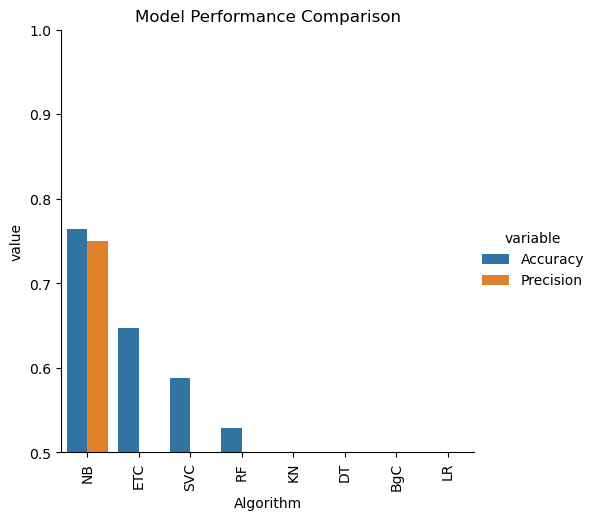

In [125]:
g = sns.catplot(x = 'Algorithm',y='value',
            hue = 'variable',data=performance_df1,kind='bar',height=5)
g.set(ylim=(0.5, 1.0))
g.set_xticklabels(rotation=90)
plt.title("Model Performance Comparison")
plt.show()

In [138]:
import pickle
pickle.dump(gnb,open('model.pkl','wb'))





In [139]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample training data
X = [
    "Win a free iPhone now!",
    "Hello, how are you doing today?",
    "You’ve won 1 lakh rupees, click here!",
    "Let's catch up for dinner tomorrow"
]
y = [1, 0, 1, 0]  # 1 = spam, 0 = not spam

# Initialize and fit the vectorizer
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

# Train a simple model
model = MultinomialNB()
model.fit(X_transformed, y)

# Save the trained model and fitted vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer trained and saved.")


✅ Model and vectorizer trained and saved.
